The commented out code in this notebook is here because without that an OOM would be thrown. However, it has to stay, to be able to calculate the resampled steps per epoch.

In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.xception import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'xception_dealing_with_imbalance_3_oversampling_and_bias'

In [3]:
train_ds_dir = os.path.join(DATA_DIR, 'training')
class_dirs = [
    os.path.join(train_ds_dir, class_dir)
    for class_dir in os.listdir(train_ds_dir)
    if os.path.isdir(os.path.join(train_ds_dir, class_dir))]
class_counts = [len(os.listdir(class_dir)) for class_dir in class_dirs]
total_samples = np.sum(class_counts)
initial_biases = np.log(class_counts / (total_samples - class_counts))

In [4]:
BATCH_SIZE = 32
balanced_train_dataset, class_names = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
num_classes = len(class_names)
# balanced_train_dataset_non_repeating = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE, do_repeat=False)

Found 8015 files belonging to 7 classes.
Found 8015 files belonging to 7 classes.


In [5]:
# all_labels = []
#
# for images, labels in balanced_train_dataset_non_repeating:
#     all_labels.append(labels.numpy())
#
# all_labels = np.concatenate(all_labels)
# class_counts = np.sum(all_labels, axis=0)

In [6]:
# mean_class_count = np.mean(class_counts)
mean_class_count = 6783.4287
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [7]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 1.8339 - categorical cross entropy: 1.8339 - mean squared error: 0.0856 - accuracy: 0.6536 - auc: 0.5033 - prc: 0.1457

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_1\assets


29/29 [==============================] - 91s 984ms/step - loss: 1.8339 - categorical cross entropy: 1.8339 - mean squared error: 0.0856 - accuracy: 0.6536 - auc: 0.5033 - prc: 0.1457 - val_loss: 1.2045 - val_categorical cross entropy: 1.2045 - val_mean squared error: 0.0792 - val_accuracy: 0.6705 - val_auc: 0.5000 - val_prc: 0.1429 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - ETA: 0s - loss: 1.2166 - categorical cross entropy: 1.2166 - mean squared error: 0.0799 - accuracy: 0.6644 - auc: 0.4958 - prc: 0.1402

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_2\assets


29/29 [==============================] - 26s 926ms/step - loss: 1.2166 - categorical cross entropy: 1.2166 - mean squared error: 0.0799 - accuracy: 0.6644 - auc: 0.4958 - prc: 0.1402 - val_loss: 1.1722 - val_categorical cross entropy: 1.1722 - val_mean squared error: 0.0774 - val_accuracy: 0.6705 - val_auc: 0.5000 - val_prc: 0.1429 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 1.1888 - categorical cross entropy: 1.1888 - mean squared error: 0.0789 - accuracy: 0.6584 - auc: 0.5019 - prc: 0.1439

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_3\assets


29/29 [==============================] - 26s 915ms/step - loss: 1.1888 - categorical cross entropy: 1.1888 - mean squared error: 0.0789 - accuracy: 0.6584 - auc: 0.5019 - prc: 0.1439 - val_loss: 1.1417 - val_categorical cross entropy: 1.1417 - val_mean squared error: 0.0755 - val_accuracy: 0.6705 - val_auc: 0.5084 - val_prc: 0.1478 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 1.1286 - categorical cross entropy: 1.1286 - mean squared error: 0.0742 - accuracy: 0.6730 - auc: 0.5242 - prc: 0.1543

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_4\assets


29/29 [==============================] - 26s 897ms/step - loss: 1.1286 - categorical cross entropy: 1.1286 - mean squared error: 0.0742 - accuracy: 0.6730 - auc: 0.5242 - prc: 0.1543 - val_loss: 1.0793 - val_categorical cross entropy: 1.0793 - val_mean squared error: 0.0715 - val_accuracy: 0.6705 - val_auc: 0.6771 - val_prc: 0.2028 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - 11s 363ms/step - loss: 1.0602 - categorical cross entropy: 1.0602 - mean squared error: 0.0691 - accuracy: 0.6746 - auc: 0.6634 - prc: 0.1955 - val_loss: 1.2572 - val_categorical cross entropy: 1.2572 - val_mean squared error: 0.0672 - val_accuracy: 0.6705 - val_auc: 0.7200 - val_prc: 0.2133 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - ETA: 0s - loss: 1.0282 - categorical cross entropy: 1.0282 - mean squared error: 0.0669 - accuracy: 0.6606 - auc: 0.7000 - prc: 0.2108

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_6\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_6\assets


29/29 [==============================] - 27s 940ms/step - loss: 1.0282 - categorical cross entropy: 1.0282 - mean squared error: 0.0669 - accuracy: 0.6606 - auc: 0.7000 - prc: 0.2108 - val_loss: 1.0016 - val_categorical cross entropy: 1.0016 - val_mean squared error: 0.0629 - val_accuracy: 0.6705 - val_auc: 0.7146 - val_prc: 0.2154 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - 9s 314ms/step - loss: 0.9505 - categorical cross entropy: 0.9505 - mean squared error: 0.0623 - accuracy: 0.6627 - auc: 0.7519 - prc: 0.2346 - val_loss: 1.1539 - val_categorical cross entropy: 1.1539 - val_mean squared error: 0.0611 - val_accuracy: 0.6705 - val_auc: 0.7542 - val_prc: 0.2284 - lr: 0.0010
Epoch 8/100
29/29 [==============================] - ETA: 0s - loss: 0.9173 - categorical cross entropy: 0.9173 - mean squared error: 0.0593 - accuracy: 0.6837 - auc: 0.7767 - prc: 0.2437

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_8\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_8\assets


29/29 [==============================] - 28s 991ms/step - loss: 0.9173 - categorical cross entropy: 0.9173 - mean squared error: 0.0593 - accuracy: 0.6837 - auc: 0.7767 - prc: 0.2437 - val_loss: 0.9421 - val_categorical cross entropy: 0.9421 - val_mean squared error: 0.0620 - val_accuracy: 0.6705 - val_auc: 0.7605 - val_prc: 0.2302 - lr: 0.0010
Epoch 9/100
29/29 [==============================] - ETA: 0s - loss: 0.8979 - categorical cross entropy: 0.8979 - mean squared error: 0.0592 - accuracy: 0.6902 - auc: 0.7790 - prc: 0.2523

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_9\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_9\assets


29/29 [==============================] - 23s 791ms/step - loss: 0.8979 - categorical cross entropy: 0.8979 - mean squared error: 0.0592 - accuracy: 0.6902 - auc: 0.7790 - prc: 0.2523 - val_loss: 0.8780 - val_categorical cross entropy: 0.8780 - val_mean squared error: 0.0574 - val_accuracy: 0.7015 - val_auc: 0.8077 - val_prc: 0.2549 - lr: 0.0010
Epoch 10/100
29/29 [==============================] - 9s 314ms/step - loss: 0.8662 - categorical cross entropy: 0.8662 - mean squared error: 0.0569 - accuracy: 0.7015 - auc: 0.7981 - prc: 0.2605 - val_loss: 1.0303 - val_categorical cross entropy: 1.0303 - val_mean squared error: 0.0623 - val_accuracy: 0.6375 - val_auc: 0.7854 - val_prc: 0.2396 - lr: 0.0010
Epoch 11/100
29/29 [==============================] - 9s 316ms/step - loss: 0.8690 - categorical cross entropy: 0.8690 - mean squared error: 0.0570 - accuracy: 0.6977 - auc: 0.8032 - prc: 0.2564 - val_loss: 1.1983 - val_categorical cross entropy: 1.1983 - val_mean squared error: 0.0590 - val_a

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_18\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_18\assets


29/29 [==============================] - 34s 1s/step - loss: 0.7603 - categorical cross entropy: 0.7603 - mean squared error: 0.0516 - accuracy: 0.7317 - auc: 0.8537 - prc: 0.3420 - val_loss: 0.8355 - val_categorical cross entropy: 0.8355 - val_mean squared error: 0.0538 - val_accuracy: 0.7090 - val_auc: 0.8406 - val_prc: 0.3718 - lr: 0.0010
Epoch 19/100
29/29 [==============================] - 9s 322ms/step - loss: 0.7892 - categorical cross entropy: 0.7892 - mean squared error: 0.0533 - accuracy: 0.7161 - auc: 0.8706 - prc: 0.3853 - val_loss: 0.9581 - val_categorical cross entropy: 0.9581 - val_mean squared error: 0.0561 - val_accuracy: 0.7170 - val_auc: 0.8519 - val_prc: 0.3727 - lr: 0.0010
Epoch 20/100
29/29 [==============================] - ETA: 0s - loss: 0.7397 - categorical cross entropy: 0.7397 - mean squared error: 0.0499 - accuracy: 0.7441 - auc: 0.8695 - prc: 0.3758

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_20\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_20\assets


29/29 [==============================] - 24s 853ms/step - loss: 0.7397 - categorical cross entropy: 0.7397 - mean squared error: 0.0499 - accuracy: 0.7441 - auc: 0.8695 - prc: 0.3758 - val_loss: 0.7902 - val_categorical cross entropy: 0.7902 - val_mean squared error: 0.0535 - val_accuracy: 0.7205 - val_auc: 0.8573 - val_prc: 0.3956 - lr: 0.0010
Epoch 21/100
29/29 [==============================] - ETA: 0s - loss: 0.7425 - categorical cross entropy: 0.7425 - mean squared error: 0.0513 - accuracy: 0.7452 - auc: 0.8789 - prc: 0.4018

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_21\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_21\assets


29/29 [==============================] - 25s 877ms/step - loss: 0.7425 - categorical cross entropy: 0.7425 - mean squared error: 0.0513 - accuracy: 0.7452 - auc: 0.8789 - prc: 0.4018 - val_loss: 0.7838 - val_categorical cross entropy: 0.7838 - val_mean squared error: 0.0504 - val_accuracy: 0.7445 - val_auc: 0.8659 - val_prc: 0.4041 - lr: 0.0010
Epoch 22/100
29/29 [==============================] - ETA: 0s - loss: 0.7771 - categorical cross entropy: 0.7771 - mean squared error: 0.0540 - accuracy: 0.7252 - auc: 0.8573 - prc: 0.3762

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_22\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_22\assets


29/29 [==============================] - 24s 834ms/step - loss: 0.7771 - categorical cross entropy: 0.7771 - mean squared error: 0.0540 - accuracy: 0.7252 - auc: 0.8573 - prc: 0.3762 - val_loss: 0.7769 - val_categorical cross entropy: 0.7769 - val_mean squared error: 0.0516 - val_accuracy: 0.7235 - val_auc: 0.8691 - val_prc: 0.3988 - lr: 0.0010
Epoch 23/100
29/29 [==============================] - 9s 310ms/step - loss: 0.7227 - categorical cross entropy: 0.7227 - mean squared error: 0.0492 - accuracy: 0.7543 - auc: 0.8751 - prc: 0.4660 - val_loss: 0.8514 - val_categorical cross entropy: 0.8514 - val_mean squared error: 0.0552 - val_accuracy: 0.7155 - val_auc: 0.8813 - val_prc: 0.4057 - lr: 0.0010
Epoch 24/100
29/29 [==============================] - 9s 315ms/step - loss: 0.6986 - categorical cross entropy: 0.6986 - mean squared error: 0.0480 - accuracy: 0.7586 - auc: 0.8859 - prc: 0.4382 - val_loss: 1.0317 - val_categorical cross entropy: 1.0317 - val_mean squared error: 0.0591 - val_a

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_25\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_25\assets


29/29 [==============================] - 26s 923ms/step - loss: 0.7105 - categorical cross entropy: 0.7105 - mean squared error: 0.0478 - accuracy: 0.7581 - auc: 0.9036 - prc: 0.4646 - val_loss: 0.7454 - val_categorical cross entropy: 0.7454 - val_mean squared error: 0.0498 - val_accuracy: 0.7485 - val_auc: 0.8884 - val_prc: 0.4841 - lr: 0.0010
Epoch 26/100
29/29 [==============================] - 9s 315ms/step - loss: 0.6686 - categorical cross entropy: 0.6686 - mean squared error: 0.0462 - accuracy: 0.7662 - auc: 0.8925 - prc: 0.4916 - val_loss: 0.8033 - val_categorical cross entropy: 0.8033 - val_mean squared error: 0.0503 - val_accuracy: 0.7510 - val_auc: 0.8713 - val_prc: 0.4574 - lr: 0.0010
Epoch 27/100
29/29 [==============================] - 9s 317ms/step - loss: 0.7088 - categorical cross entropy: 0.7088 - mean squared error: 0.0491 - accuracy: 0.7489 - auc: 0.8871 - prc: 0.4471 - val_loss: 0.8856 - val_categorical cross entropy: 0.8856 - val_mean squared error: 0.0536 - val_a

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_29\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_29\assets


29/29 [==============================] - 32s 1s/step - loss: 0.6677 - categorical cross entropy: 0.6677 - mean squared error: 0.0470 - accuracy: 0.7538 - auc: 0.9167 - prc: 0.4916 - val_loss: 0.7041 - val_categorical cross entropy: 0.7041 - val_mean squared error: 0.0475 - val_accuracy: 0.7550 - val_auc: 0.9107 - val_prc: 0.4932 - lr: 0.0010
Epoch 30/100
29/29 [==============================] - ETA: 0s - loss: 0.6524 - categorical cross entropy: 0.6524 - mean squared error: 0.0451 - accuracy: 0.7705 - auc: 0.9205 - prc: 0.5103

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_30\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_30\assets


29/29 [==============================] - 24s 825ms/step - loss: 0.6524 - categorical cross entropy: 0.6524 - mean squared error: 0.0451 - accuracy: 0.7705 - auc: 0.9205 - prc: 0.5103 - val_loss: 0.6709 - val_categorical cross entropy: 0.6709 - val_mean squared error: 0.0458 - val_accuracy: 0.7730 - val_auc: 0.9036 - val_prc: 0.5048 - lr: 0.0010
Epoch 31/100
29/29 [==============================] - 9s 316ms/step - loss: 0.6796 - categorical cross entropy: 0.6796 - mean squared error: 0.0464 - accuracy: 0.7689 - auc: 0.9001 - prc: 0.4985 - val_loss: 1.7540 - val_categorical cross entropy: 1.7540 - val_mean squared error: 0.0813 - val_accuracy: 0.6355 - val_auc: 0.8011 - val_prc: 0.4012 - lr: 0.0010
Epoch 32/100
29/29 [==============================] - 9s 317ms/step - loss: 0.6809 - categorical cross entropy: 0.6809 - mean squared error: 0.0460 - accuracy: 0.7742 - auc: 0.8996 - prc: 0.4763 - val_loss: 0.7764 - val_categorical cross entropy: 0.7764 - val_mean squared error: 0.0526 - val_a

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_33\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_33\assets


29/29 [==============================] - 25s 883ms/step - loss: 0.6353 - categorical cross entropy: 0.6353 - mean squared error: 0.0445 - accuracy: 0.7769 - auc: 0.9118 - prc: 0.5060 - val_loss: 0.6548 - val_categorical cross entropy: 0.6548 - val_mean squared error: 0.0449 - val_accuracy: 0.7735 - val_auc: 0.9187 - val_prc: 0.5253 - lr: 0.0010
Epoch 34/100
29/29 [==============================] - ETA: 0s - loss: 0.6455 - categorical cross entropy: 0.6455 - mean squared error: 0.0438 - accuracy: 0.7883 - auc: 0.9148 - prc: 0.5002

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_34\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_34\assets


29/29 [==============================] - 23s 818ms/step - loss: 0.6455 - categorical cross entropy: 0.6455 - mean squared error: 0.0438 - accuracy: 0.7883 - auc: 0.9148 - prc: 0.5002 - val_loss: 0.6213 - val_categorical cross entropy: 0.6213 - val_mean squared error: 0.0429 - val_accuracy: 0.7920 - val_auc: 0.9184 - val_prc: 0.5677 - lr: 0.0010
Epoch 35/100
29/29 [==============================] - 9s 318ms/step - loss: 0.6377 - categorical cross entropy: 0.6377 - mean squared error: 0.0459 - accuracy: 0.7748 - auc: 0.9241 - prc: 0.5310 - val_loss: 0.6814 - val_categorical cross entropy: 0.6814 - val_mean squared error: 0.0478 - val_accuracy: 0.7550 - val_auc: 0.9000 - val_prc: 0.5279 - lr: 0.0010
Epoch 36/100
29/29 [==============================] - 9s 315ms/step - loss: 0.6166 - categorical cross entropy: 0.6166 - mean squared error: 0.0446 - accuracy: 0.7764 - auc: 0.9185 - prc: 0.5078 - val_loss: 0.6854 - val_categorical cross entropy: 0.6854 - val_mean squared error: 0.0479 - val_a

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_51\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_51\assets


29/29 [==============================] - 30s 1s/step - loss: 0.5424 - categorical cross entropy: 0.5424 - mean squared error: 0.0390 - accuracy: 0.8055 - auc: 0.9467 - prc: 0.6811 - val_loss: 0.6080 - val_categorical cross entropy: 0.6080 - val_mean squared error: 0.0400 - val_accuracy: 0.8075 - val_auc: 0.9135 - val_prc: 0.6397 - lr: 9.5000e-04
Epoch 52/100
29/29 [==============================] - 9s 315ms/step - loss: 0.5598 - categorical cross entropy: 0.5598 - mean squared error: 0.0398 - accuracy: 0.8044 - auc: 0.9403 - prc: 0.6894 - val_loss: 0.6598 - val_categorical cross entropy: 0.6598 - val_mean squared error: 0.0441 - val_accuracy: 0.7770 - val_auc: 0.9281 - val_prc: 0.6544 - lr: 9.5000e-04
Epoch 53/100
29/29 [==============================] - 9s 318ms/step - loss: 0.5631 - categorical cross entropy: 0.5631 - mean squared error: 0.0401 - accuracy: 0.7958 - auc: 0.9303 - prc: 0.6198 - val_loss: 0.6295 - val_categorical cross entropy: 0.6295 - val_mean squared error: 0.0424 - 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_57\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_57\assets


29/29 [==============================] - 28s 1s/step - loss: 0.4856 - categorical cross entropy: 0.4856 - mean squared error: 0.0351 - accuracy: 0.8297 - auc: 0.9566 - prc: 0.7018 - val_loss: 0.5860 - val_categorical cross entropy: 0.5860 - val_mean squared error: 0.0407 - val_accuracy: 0.7995 - val_auc: 0.9239 - val_prc: 0.6312 - lr: 9.5000e-04
Epoch 58/100
29/29 [==============================] - 9s 317ms/step - loss: 0.5055 - categorical cross entropy: 0.5055 - mean squared error: 0.0362 - accuracy: 0.8238 - auc: 0.9517 - prc: 0.6812 - val_loss: 0.6175 - val_categorical cross entropy: 0.6175 - val_mean squared error: 0.0421 - val_accuracy: 0.7995 - val_auc: 0.9278 - val_prc: 0.6594 - lr: 9.5000e-04
Epoch 59/100
29/29 [==============================] - ETA: 0s - loss: 0.4966 - categorical cross entropy: 0.4966 - mean squared error: 0.0354 - accuracy: 0.8270 - auc: 0.9480 - prc: 0.6903

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_59\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_59\assets


29/29 [==============================] - 27s 949ms/step - loss: 0.4966 - categorical cross entropy: 0.4966 - mean squared error: 0.0354 - accuracy: 0.8270 - auc: 0.9480 - prc: 0.6903 - val_loss: 0.5725 - val_categorical cross entropy: 0.5725 - val_mean squared error: 0.0393 - val_accuracy: 0.8085 - val_auc: 0.9323 - val_prc: 0.6851 - lr: 9.5000e-04
Epoch 60/100
29/29 [==============================] - ETA: 0s - loss: 0.5032 - categorical cross entropy: 0.5032 - mean squared error: 0.0352 - accuracy: 0.8303 - auc: 0.9504 - prc: 0.7468

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_60\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_60\assets


29/29 [==============================] - 27s 944ms/step - loss: 0.5032 - categorical cross entropy: 0.5032 - mean squared error: 0.0352 - accuracy: 0.8303 - auc: 0.9504 - prc: 0.7468 - val_loss: 0.5717 - val_categorical cross entropy: 0.5717 - val_mean squared error: 0.0390 - val_accuracy: 0.8115 - val_auc: 0.9321 - val_prc: 0.6783 - lr: 9.5000e-04
Epoch 61/100
29/29 [==============================] - 9s 320ms/step - loss: 0.4802 - categorical cross entropy: 0.4802 - mean squared error: 0.0347 - accuracy: 0.8233 - auc: 0.9522 - prc: 0.7287 - val_loss: 0.6374 - val_categorical cross entropy: 0.6374 - val_mean squared error: 0.0436 - val_accuracy: 0.7895 - val_auc: 0.9088 - val_prc: 0.6294 - lr: 9.5000e-04
Epoch 62/100
29/29 [==============================] - 9s 317ms/step - loss: 0.4958 - categorical cross entropy: 0.4958 - mean squared error: 0.0358 - accuracy: 0.8211 - auc: 0.9527 - prc: 0.7225 - val_loss: 0.6447 - val_categorical cross entropy: 0.6447 - val_mean squared error: 0.0453

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_71\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_71\assets


29/29 [==============================] - 28s 996ms/step - loss: 0.4618 - categorical cross entropy: 0.4618 - mean squared error: 0.0339 - accuracy: 0.8330 - auc: 0.9627 - prc: 0.7593 - val_loss: 0.5675 - val_categorical cross entropy: 0.5675 - val_mean squared error: 0.0392 - val_accuracy: 0.8100 - val_auc: 0.9250 - val_prc: 0.7085 - lr: 9.0250e-04
Epoch 72/100
29/29 [==============================] - 9s 315ms/step - loss: 0.4933 - categorical cross entropy: 0.4933 - mean squared error: 0.0356 - accuracy: 0.8265 - auc: 0.9554 - prc: 0.7569 - val_loss: 0.5873 - val_categorical cross entropy: 0.5873 - val_mean squared error: 0.0417 - val_accuracy: 0.7995 - val_auc: 0.9332 - val_prc: 0.7114 - lr: 9.0250e-04
Epoch 73/100
29/29 [==============================] - ETA: 0s - loss: 0.4718 - categorical cross entropy: 0.4718 - mean squared error: 0.0340 - accuracy: 0.8314 - auc: 0.9594 - prc: 0.7295

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_73\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_73\assets


29/29 [==============================] - 26s 920ms/step - loss: 0.4718 - categorical cross entropy: 0.4718 - mean squared error: 0.0340 - accuracy: 0.8314 - auc: 0.9594 - prc: 0.7295 - val_loss: 0.5359 - val_categorical cross entropy: 0.5359 - val_mean squared error: 0.0371 - val_accuracy: 0.8240 - val_auc: 0.9346 - val_prc: 0.7165 - lr: 9.0250e-04
Epoch 74/100
29/29 [==============================] - 9s 315ms/step - loss: 0.4445 - categorical cross entropy: 0.4445 - mean squared error: 0.0317 - accuracy: 0.8454 - auc: 0.9605 - prc: 0.7658 - val_loss: 0.5856 - val_categorical cross entropy: 0.5856 - val_mean squared error: 0.0420 - val_accuracy: 0.7970 - val_auc: 0.9319 - val_prc: 0.7057 - lr: 9.0250e-04
Epoch 75/100
29/29 [==============================] - 9s 315ms/step - loss: 0.4187 - categorical cross entropy: 0.4187 - mean squared error: 0.0297 - accuracy: 0.8610 - auc: 0.9550 - prc: 0.7861 - val_loss: 0.5617 - val_categorical cross entropy: 0.5617 - val_mean squared error: 0.0374

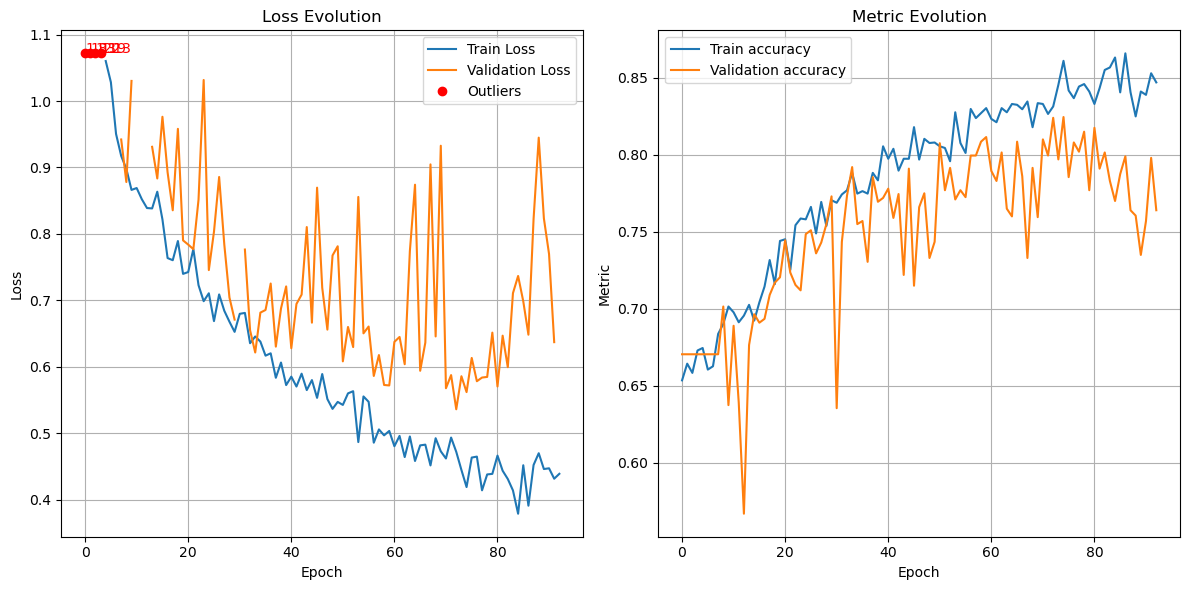

(<keras.engine.functional.Functional at 0x246e485dd90>,
 <keras.callbacks.History at 0x246e33c8190>)

In [8]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
    lambda: get_basic_model(
        HEIGHT,
        WIDTH,
        num_classes,
        metrics=METRICS,
        biases=keras.initializers.Constant(initial_biases)),
    get_augmentation_layers,
    num_classes,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20)